## Step1: Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy import stats
import pandas as pd
import ydata_profiling as pp
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import ast
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Step 2: Load the dataset

In [2]:
data = pd.read_csv("generated_dataset.csv")
columns_to_display = ['volunteer_id', 'first_name', 'last_name','gender', 'age', 'vaccination_type','contact_number', 'location', 'no_of_dosage', 'timestamp', 'oxygen_saturation', 'pulse_rate', 'temp', 'bp', 'diabetes', 'step_count' ]
data_subset = data[columns_to_display]
data_subset.head(n=10)

volunteer_id first_name  last_name  gender  age vaccination_type  \
0             1    Lindsay   Anderson    Male   23       Covishield   
1             2      Laura     Castro  Female   28          Covaxin   
2             3     Daniel  Cervantes  Female   21          Covaxin   
3             4    Jeffery      Jones  Female   29          Covaxin   
4             5     Thomas   Carrillo  Female   48       Covishield   
5             6     Stacey  Rodriguez  Female   43          Covaxin   
6             7      Amber    Winters    Male   55       Covishield   
7             8    William  Mccormick  Female   28          Covaxin   
8             9     Joseph      Duffy  Female   35          Covaxin   
9            10     Robert     Arroyo  Female   20          Covaxin   

           contact_number        location  no_of_dosage            timestamp  \
0       (957)391-2402x040  Andhra Pradesh             2  2023-05-31 00:00:00   
1      (369)509-8982x6632  Andhra Pradesh             2  2023-05-31 00:00:00   
2  001-280-340-8805x56217      Tamil Nadu             2  2023-05-31 00:00:00   
3     (595)602-0763x77860       Karnataka             1  2023-05-31 00:00:00   
4    +1-961-672-8231x8806      Tamil Nadu             1  2023-05-31 00:00:00   
5            463.332.7405  Andhra Pradesh             1  2023-05-31 00:00:00   
6    001-516-637-7983x368       Karnataka             2  2023-05-31 00:00:00   
7      (249)706-8661x5551     Maharashtra             2  2023-05-31 00:00:00   
8       (970)663-8675x204      Tamil Nadu             2  2023-05-31 00:00:00   
9        001-332-171-8061  Andhra Pradesh             2  2023-05-31 00:00:00   

   oxygen_saturation  pulse_rate        temp      bp  diabetes  step_count  
0                 99          77  103.021399  147/95       272         493  
1                 97          72   99.336569  126/93       224         215  
2                 86          80  100.701888  132/97       294         801  
3                 90          99  102.741251  149/84       239         505  
4                 84          88  100.667567  148/87       183         367  
5                100         112  102.411337  111/87       271         919  
6                 90         123   99.399991  124/77       170         134  
7                 91         128  102.715330  142/89       105         458  
8                 99          92  103.446580  145/72       179          61  
9                 98          72  101.646774  138/86       244         990

## Step 3: Data Understanding

In [3]:
profile = pp.ProfileReport(data, title="Silverline Phase-1 Vaccination Report", dark_mode=False, progress_bar=False, explorative=True, plot={"correlation": {"cmap": "coolwarm", "bad": "#000000"}})
profile.to_notebook_iframe()

### 3D plot of oxygen saturation, pulse rate and zone

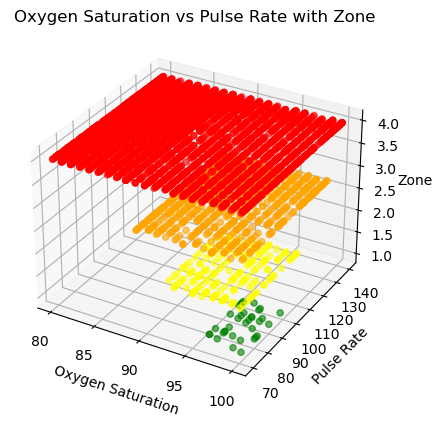

In [4]:
%matplotlib inline
# Define a dictionary to map zone categories to colors and numeric values
zone_colors = {'Green': ('green', 1), 'Yellow': ('yellow', 2), 'Amber': ('orange', 3), 'Red': ('red', 4)}

# Get the oxygen saturation, pulse rate, and zone columns
oxygen_saturation = data['oxygen_saturation']
pulse_rate = data['pulse_rate']
zone = data['zone']

# Map zone categories to colors and numeric values
zone_color_values = zone.map(lambda x: zone_colors[x][0])
zone_numeric_values = zone.map(lambda x: zone_colors[x][1])

# Create a new figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
ax.scatter(oxygen_saturation, pulse_rate, zone_numeric_values, c=zone_color_values, alpha=0.6)

# Set labels and title
ax.set_xlabel('Oxygen Saturation')
ax.set_ylabel('Pulse Rate')
ax.set_zlabel('Zone')
ax.set_title('Oxygen Saturation vs Pulse Rate with Zone')

# Show the plot
plt.show()

The 3D model is a scatter plot that visualizes the relationship between "Oxygen_saturation," "Pulse_rate," and "Zone." Each data point represents a volunteer, and the color of the data point corresponds to the assigned zone (e.g., Green, Yellow, Amber, or Red). This plot helps us understand that the majority of the volunteers are in red zone and minority of the volunteers are in green zone

### Number of volunteer IDs in each zone

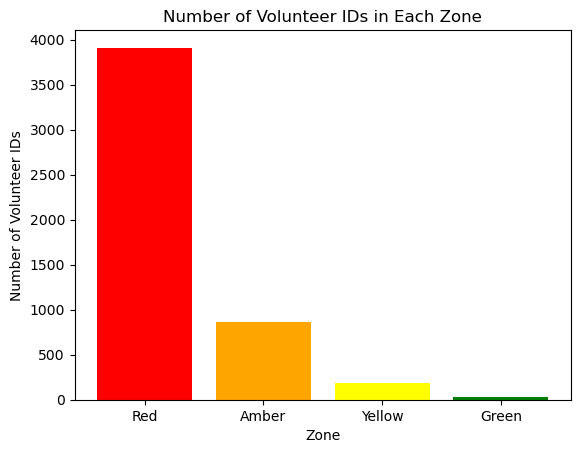

In [5]:
# Count the number of volunteer IDs in each zone
zone_counts = data['zone'].value_counts()

# Define colors for the bars
colors = ['red', 'orange', 'yellow', 'green']

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the zone counts with assigned colors
ax.bar(zone_counts.index, zone_counts.values, color=colors)

# Set the labels and title
ax.set_xlabel('Zone')
ax.set_ylabel('Number of Volunteer IDs')
ax.set_title('Number of Volunteer IDs in Each Zone')

# Display the plot
plt.show()

The bar plots display the count of volunteer IDs in each zone. The height of each bar represents the number of volunteer IDs, and the colors of the bars correspond to the different zones (e.g., Green, Yellow, Amber, Red). This visualization provides an overview of the distribution of volunteer IDs across the zones.

### Number of volunteers of age in each zone

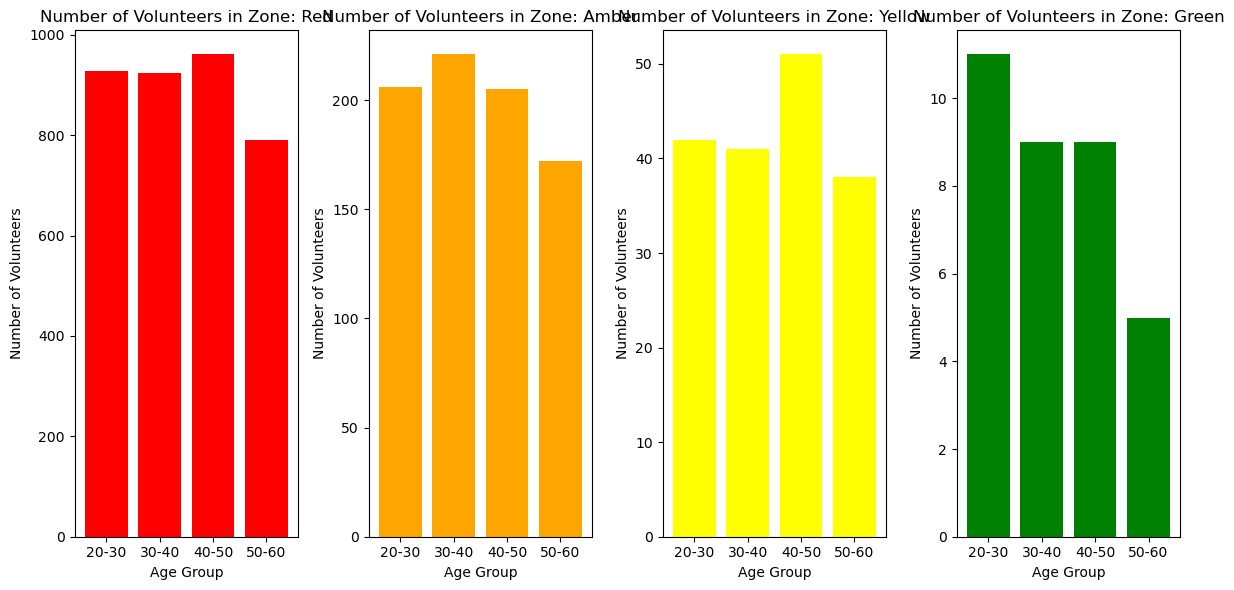

In [6]:
# Define the age group bins
age_bins = [20, 30, 40, 50, 60]

# Create a new column 'age_group' based on the age bins
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=['20-30', '30-40', '40-50', '50-60'])

# Count the number of volunteer IDs in each zone
zone_counts = data['zone'].value_counts()

# Create a figure with subplots for each zone
fig, axes = plt.subplots(nrows=1, ncols=len(zone_counts), figsize=(12, 6))

# Specify the colors for each graph
colors = ['red', 'orange', 'yellow', 'green']

# Iterate over the zones and create a bar plot for each
for i, (zone, ax) in enumerate(zip(zone_counts.index, axes)):
    # Group the data by age group and zone, and count the number of volunteers in each group
    age_zone_counts = data[data['zone'] == zone].groupby('age_group').size()

    # Plot the number of volunteers in each age group for the current zone with the assigned color
    ax.bar(age_zone_counts.index, age_zone_counts.values, color=colors[i])
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Number of Volunteers')
    ax.set_title(f'Number of Volunteers in Zone: {zone}')

# Adjust the layout of subplots
plt.tight_layout()

# Display the plot
plt.show()

###  Number of volunteer IDs for each location

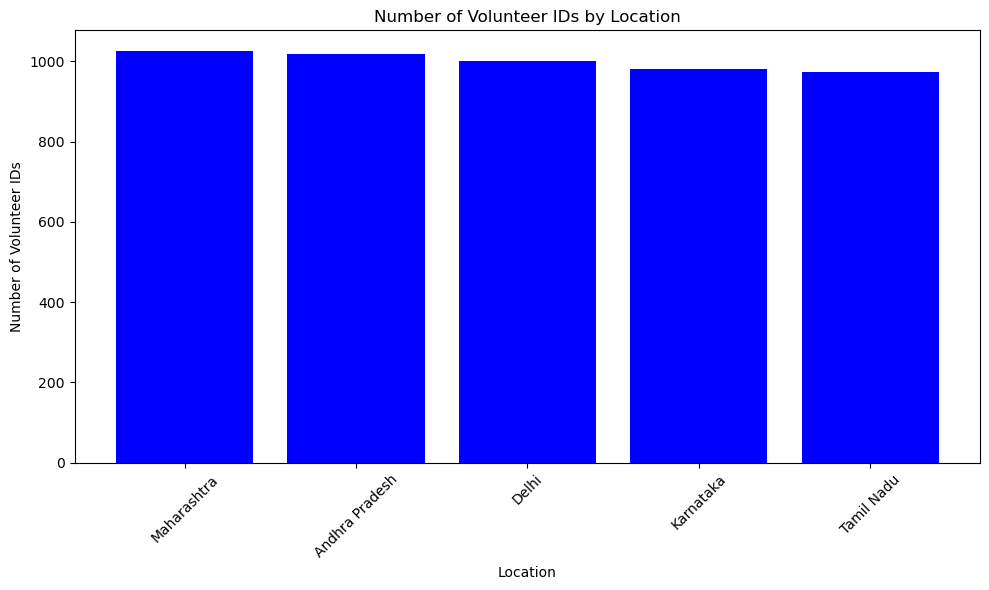

In [7]:
# Count the number of volunteer IDs for each location
location_counts = data['location'].value_counts()

# Create a bar plot for location vs volunteer_id with a default color
plt.figure(figsize=(10, 6))
plt.bar(location_counts.index, location_counts.values, color='blue')
plt.xlabel('Location')
plt.ylabel('Number of Volunteer IDs')
plt.title('Number of Volunteer IDs by Location')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

## Step 4:  Finding the correlation

In [8]:
import pandas as pd

# Read the dataset from the CSV file
df = pd.read_csv('winning_dataset.csv')

# Select the columns you want to include in the correlation matrix
selected_columns = ['age', 'oxygen_saturation', 'pulse_rate', 'temp', 'bp', 'diabetes', 'sleep_duration', 'step_count', 'no_of_dosage']

# Create a new DataFrame with the selected columns
selected_df = df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                        age  oxygen_saturation  pulse_rate      temp  \
age                1.000000           0.013902    0.001556 -0.025679   
oxygen_saturation  0.013902           1.000000    0.002315  0.025363   
pulse_rate         0.001556           0.002315    1.000000  0.019436   
temp              -0.025679           0.025363    0.019436  1.000000   
diabetes           0.008899           0.017421    0.002921  0.000487   
sleep_duration    -0.006850           0.032754    0.013929 -0.003737   
step_count         0.000564           0.000007    0.011267 -0.017712   
no_of_dosage       0.014415          -0.003342    0.004134  0.010593   

                   diabetes  sleep_duration  step_count  no_of_dosage  
age                0.008899       -0.006850    0.000564      0.014415  
oxygen_saturation  0.017421        0.032754    0.000007     -0.003342  
pulse_rate         0.002921        0.013929    0.011267      0.004134  
temp               0.000487       -0.003737   -0.017712      0.

## Step 5:Data Prepration

### Handeling missing values using imputation techniques

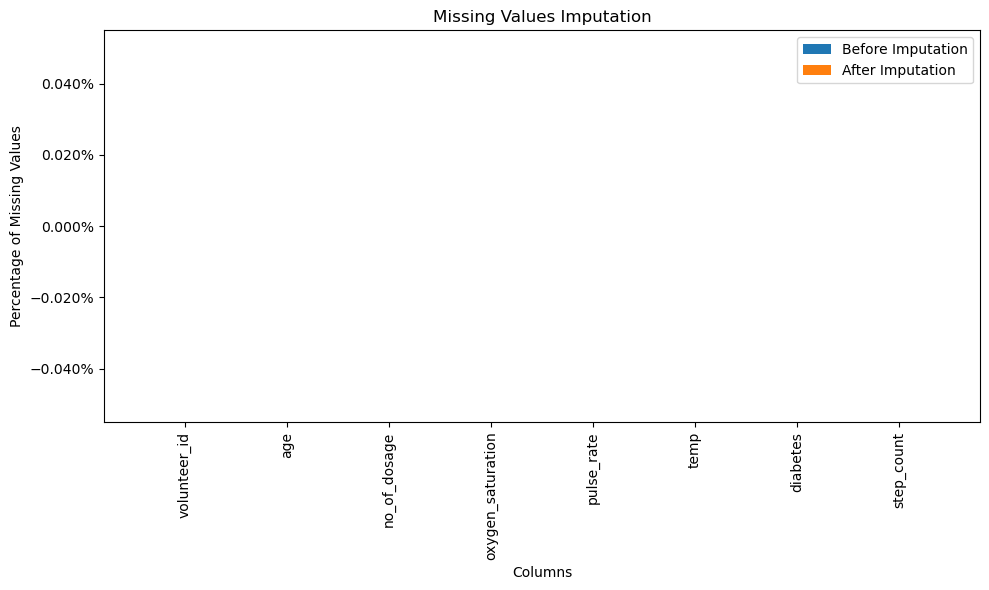

In [9]:
# Select numeric columns for mean calculation
numeric_columns = data.select_dtypes(include=np.number)

# Calculate the percentage of missing values before imputation
missing_values_before = numeric_columns.isnull().sum() / len(numeric_columns) * 100

# Perform mean imputation
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())
numeric_columns_imputed = numeric_columns.fillna(numeric_columns.mean())

# Calculate the percentage of missing values after imputation
missing_values_after = numeric_columns_imputed.isnull().sum() / len(numeric_columns_imputed) * 100

# Create a bar plot to visualize the missing values
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(numeric_columns.columns, missing_values_before, label='Before Imputation')
ax.bar(numeric_columns_imputed.columns, missing_values_after, label='After Imputation')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of Missing Values')
ax.set_title('Missing Values Imputation')
ax.legend()
plt.xticks(rotation=90)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

plt.tight_layout()
plt.show()

The missing values in the dataset are handled using mean imputation for numeric columns. The code calculates the percentage of missing values before and after imputation, and a bar plot is generated to visualize the impact of imputation. Mean imputation replaces missing values with the mean of the respective column. Imputation helps in preserving the overall structure of the data and ensures that no data points are lost due to missing values.

## Step 5: Modeling or Training

### Load the dataset

In [10]:
generated_dataset = pd.read_csv('generated_dataset.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset

# (B) Using Random Forest

### Preprocess the 'bp' column

In [11]:
data[['systolic_bp', 'diastolic_bp']] = data['bp'].str.split('/', expand=True).astype(int)

### Select features and target variable for zone prediction

In [12]:
X_zone = data[['oxygen_saturation', 'pulse_rate', 'temp', 'systolic_bp', 'diastolic_bp']]
y_zone = data['zone']

### Split the data into training and testing sets

In [13]:
X_zone_train, X_zone_test, y_zone_train, y_zone_test = train_test_split(X_zone, y_zone, test_size=0.2, random_state=42)

### Train the Random Forest Classifier for Zone Prediction

In [14]:
rf_classifier_zone = RandomForestClassifier()
rf_classifier_zone.fit(X_zone_train, y_zone_train)

RandomForestClassifier()

### Make Predictions for Zone

In [15]:
y_zone_pred = rf_classifier_zone.predict(X_zone_test)

### Evaluate the Model for Zone

In [16]:
report_zone = classification_report(y_zone_test, y_zone_pred, zero_division=1)
print("Zone Prediction Report:")
print(report_zone)

Zone Prediction Report:
              precision    recall  f1-score   support

       Amber       0.98      0.97      0.98       181
       Green       0.88      1.00      0.93         7
         Red       0.99      1.00      1.00       778
      Yellow       1.00      0.97      0.99        34

    accuracy                           0.99      1000
   macro avg       0.96      0.98      0.97      1000
weighted avg       0.99      0.99      0.99      1000



### Calculate accuracy for zone

In [17]:
zone_accuracy = accuracy_score(y_zone_test, y_zone_pred)
zone_accuracy_percent = zone_accuracy * 100
print("Zone Prediction Accuracy:", zone_accuracy_percent, "%")

Zone Prediction Accuracy: 99.1 %


### Display the predicted zone along with the additional parameters for comparison

In [31]:
comparison_df_zone = X_zone_test.copy()
comparison_df_zone['Actual Zone'] = y_zone_test
comparison_df_zone['Predicted Zone'] = y_zone_pred
print(comparison_df_zone)

      oxygen_saturation  pulse_rate        temp  systolic_bp  diastolic_bp  \
1501                 95         117  103.900689          139            74   
2586                 90          92  102.730559          136            84   
2653                 94          95   98.759681          110            73   
1055                 81         123   99.649031          147            74   
705                  89         116   98.877748          127            81   
...                 ...         ...         ...          ...           ...   
4711                 93         131  100.791745          136            76   
2313                100         124  102.997807          148            76   
3214                 82          71  101.525912          123            96   
2732                 82          99  103.464139          142            73   
1926                 95         114  100.757443          140            75   

     Actual Zone Predicted Zone  
1501         Red            R

In [19]:
# Create a DataFrame to compare the actual and predicted zones
comparison_df_zone = pd.DataFrame({'Actual Zone': y_zone_test, 'Predicted Zone': y_zone_pred})

# Display the DataFrame
print(comparison_df_zone)

     Actual Zone Predicted Zone
1501         Red            Red
2586         Red            Red
2653       Amber          Amber
1055         Red            Red
705          Red            Red
...          ...            ...
4711         Red            Red
2313         Red            Red
3214         Red            Red
2732         Red            Red
1926         Red            Red

[1000 rows x 2 columns]


### Split the Data for identified condition and prescription prediction

In [20]:
X_prescription = data[['oxygen_saturation', 'pulse_rate', 'temp', 'systolic_bp', 'diastolic_bp', 'diabetes']]
y_prescription = data[['identified_condition', 'prescription_steps']]
X_prescription_train, X_prescription_test, y_prescription_train, y_prescription_test = train_test_split(
    X_prescription, y_prescription, test_size=0.2, random_state=42)

### Train the Random Forest Classifier for identified condition and prescription prediction

In [21]:
rf_classifier_prescription = RandomForestClassifier()
rf_classifier_prescription.fit(X_prescription_train, y_prescription_train)

RandomForestClassifier()

### Generate Predictions for identified condition and prescription steps

In [22]:
# Generate Predictions for identified condition and prescription steps
y_prescription_pred = rf_classifier_prescription.predict(X_prescription_test)

# Convert y_prescription_test to NumPy array
y_prescription_test_np = y_prescription_test.to_numpy()

### For binary targets

In [23]:
# For binary targets
report_binary = classification_report(y_prescription_test_np[:, 0], y_prescription_pred[:, 0], zero_division=1)
print("Binary Targets Report:")
print(report_binary)

Binary Targets Report:
                                                                                               precision    recall  f1-score   support

                                            ['Fever', 'High Blood Pressure', 'High Diabetes']       1.00      1.00      1.00        75
                                                             ['Fever', 'High Blood Pressure']       1.00      1.00      1.00         7
                                                                   ['Fever', 'High Diabetes']       1.00      1.00      1.00        21
                                                                                    ['Fever']       1.00      1.00      1.00         2
                                                     ['High Blood Pressure', 'High Diabetes']       1.00      1.00      1.00         9
                                                                      ['High Blood Pressure']       1.00      1.00      1.00         2
                               

### Accuracy of binary report

In [24]:
# Assuming you have the classification report for binary targets
report_binary = classification_report(y_prescription_test_np[:, 0], y_prescription_pred[:, 0], zero_division=1)

# Calculate accuracy for binary targets
accuracy_binary = accuracy_score(y_prescription_test_np[:, 0], y_prescription_pred[:, 0])
accuracy_binary_percentage = accuracy_binary * 100
print("Accuracy (Binary): {:.2f}%".format(accuracy_binary_percentage))

Accuracy (Binary): 99.60%


### Display the actual identified condition and predicted identified condition along with the additional parameters for comparison

In [25]:
comparison_df_prescription = X_prescription_test.copy()
comparison_df_prescription['Actual Identified Condition'] = y_prescription_test_np[:, 0]
comparison_df_prescription['Predicted Identified Condition'] = y_prescription_pred[:, 0]
print(comparison_df_prescription)

      oxygen_saturation  pulse_rate        temp  systolic_bp  diastolic_bp  \
1501                 95         117  103.900689          139            74   
2586                 90          92  102.730559          136            84   
2653                 94          95   98.759681          110            73   
1055                 81         123   99.649031          147            74   
705                  89         116   98.877748          127            81   
...                 ...         ...         ...          ...           ...   
4711                 93         131  100.791745          136            76   
2313                100         124  102.997807          148            76   
3214                 82          71  101.525912          123            96   
2732                 82          99  103.464139          142            73   
1926                 95         114  100.757443          140            75   

      diabetes                        Actual Identified Conditi

### Display the actual identified condition and predicted identified condition 

In [26]:
# Create a DataFrame to compare the actual and predicted identified conditions
comparison_df_identified_condition = pd.DataFrame({'Actual Identified Condition': y_prescription_test_np[:, 0],
                                                   'Predicted Identified Condition': y_prescription_pred[:, 0]})

# Display the DataFrame
print(comparison_df_identified_condition)

                           Actual Identified Condition  \
0    ['High Pulse Rate', 'Fever', 'High Blood Press...   
1    ['Low Oxygen Saturation', 'Fever', 'High Blood...   
2    ['Low Oxygen Saturation', 'Fever', 'High Diabe...   
3    ['Low Oxygen Saturation', 'High Pulse Rate', '...   
4    ['Low Oxygen Saturation', 'High Pulse Rate', '...   
..                                                 ...   
995  ['Low Oxygen Saturation', 'High Pulse Rate', '...   
996  ['High Pulse Rate', 'Fever', 'High Blood Press...   
997  ['Low Oxygen Saturation', 'Fever', 'High Blood...   
998  ['Low Oxygen Saturation', 'Fever', 'High Blood...   
999  ['High Pulse Rate', 'Fever', 'High Blood Press...   

                        Predicted Identified Condition  
0    ['High Pulse Rate', 'Fever', 'High Blood Press...  
1    ['Low Oxygen Saturation', 'Fever', 'High Blood...  
2    ['Low Oxygen Saturation', 'Fever', 'High Diabe...  
3    ['Low Oxygen Saturation', 'High Pulse Rate', '...  
4    ['Low Oxygen 

### For multiclass targets

In [27]:
report_multiclass = classification_report(y_prescription_test_np[:, 1:], y_prescription_pred[:, 1:], zero_division=1)
print("Multiclass Targets Report:")
print(report_multiclass)

Multiclass Targets Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  precision    recall  f1-score   support

                                                                                                                                                                                                                                                {'Fever': 'Keep hy

### Display the actual prescription steps and predicted prescription steps 

In [37]:
# Create a DataFrame to compare the actual and predicted prescription steps
comparison_df_prescription['Actual Prescription Steps'] = y_prescription_test_np[:, 1]
comparison_df_prescription['Predicted Prescription Steps'] = comparison_df_prescription['predicted_prescription_binary'] + ', ' + comparison_df_prescription['predicted_prescription_multiclass']

# Display the DataFrame
print(comparison_df_prescription[['Actual Prescription Steps', 'Predicted Prescription Steps']])

                              Actual Prescription Steps  \
1501  {'High Pulse Rate': 'Seek immediate medical at...   
2586  {'Low Oxygen Saturation': 'Seek medical attent...   
2653  {'Low Oxygen Saturation': 'Monitor oxygen satu...   
1055  {'Low Oxygen Saturation': 'Seek immediate medi...   
705   {'Low Oxygen Saturation': 'Seek medical attent...   
...                                                 ...   
4711  {'Low Oxygen Saturation': 'Monitor oxygen satu...   
2313  {'High Pulse Rate': 'Seek immediate medical at...   
3214  {'Low Oxygen Saturation': 'Seek immediate medi...   
2732  {'Low Oxygen Saturation': 'Seek immediate medi...   
1926  {'High Pulse Rate': 'Seek immediate medical at...   

                           Predicted Prescription Steps  
1501  ['High Pulse Rate', 'Fever', 'High Blood Press...  
2586  ['Low Oxygen Saturation', 'Fever', 'High Blood...  
2653  ['Low Oxygen Saturation', 'Fever', 'High Diabe...  
1055  ['Low Oxygen Saturation', 'High Pulse Rate', '...  
7

### Accuracy of multiclass report

In [43]:
import ast
import warnings
from sklearn.metrics import classification_report

# Assuming you have the classification report
report_binary = classification_report(y_prescription_test_np[:, 0], y_prescription_pred[:, 0])

# Preprocess multiclass labels
def preprocess_multiclass_labels(label):
    if label:
        label_dict = ast.literal_eval(label)
        if label_dict:
            return list(label_dict.keys())[0]
    return None

# Convert the predictions and true labels to suitable format for multiclass targets
y_prescription_test_processed = [preprocess_multiclass_labels(label) for label in y_prescription_test_np[:, 1] if label]
y_prescription_pred_processed = [preprocess_multiclass_labels(label) for label in y_prescription_pred[:, 1] if label]

# Remove any remaining None values
y_prescription_test_processed = [label for label in y_prescription_test_processed if label is not None]
y_prescription_pred_processed = [label for label in y_prescription_pred_processed if label is not None]

# Override classification_report to handle the warning
def classification_report_with_zero_division(*args, **kwargs):
    kwargs['zero_division'] = 1
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)
        return classification_report(*args, **kwargs)

# Calculate accuracy for multiclass targets
def calculate_accuracy(y_true, y_pred):
    correct = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total = len(y_true)
    return correct / total if total > 0 else 0.0

# Set the classification_report_with_zero_division as the new classification_report function
classification_report = classification_report_with_zero_division

accuracy_multiclass = calculate_accuracy(y_prescription_test_processed, y_prescription_pred_processed)
accuracy_multiclass_percentage = accuracy_multiclass * 100
print("Accuracy (Multiclass): {:.2f}%".format(accuracy_multiclass_percentage))

Accuracy (Multiclass): 100.00%
